## Dataset

1. preg: Number of times pregnant
2. plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres: Diastolic blood pressure (mm Hg)
4. skin: Triceps skin fold thickness (mm)
5. insu: 2-Hour serum insulin (mu U/ml)
6. mass: Body mass index (weight in kg/(height in m)^2)
7. pedi: Diabetes pedigree function
8. age: Age (years)
9. class: Class variable (0 or 1)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
dia_all = pd.read_csv("diabetes.txt") # This loads the full dataset 
                 # In the file, attributes are separated by ,

In [2]:
dia_all.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


## Seperate the inpout (attributes) from target (label)

In [3]:
sourcevars = dia_all.iloc[:,:-1] #all rows + all columns except the last one
targetvar = dia_all.iloc[:,-1:] #all rows + only the last column

In [4]:
sourcevars.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
targetvar.head()

,class
0,tested_positive
1,tested_negative
2,tested_positive
3,tested_negative
4,tested_positive


## EDA

In [6]:
#your code here
dia_all.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
# Mean 
print('Mean of the source variables \n',sourcevars.mean())

Mean of the source variables 
 preg      3.845052
plas    120.894531
pres     69.105469
skin     20.536458
insu     79.799479
mass     31.992578
pedi      0.471876
age      33.240885
dtype: float64


In [8]:
# Median 
print('Median of the source variables \n',sourcevars.median()) 

Median of the source variables 
 preg      3.0000
plas    117.0000
pres     72.0000
skin     23.0000
insu     30.5000
mass     32.0000
pedi      0.3725
age      29.0000
dtype: float64


In [9]:
# Modes
print('Modes of the source variables \n',sourcevars.mode())

Modes of the source variables 
    preg  plas  pres  skin  insu  mass   pedi   age
0   1.0    99  70.0   0.0   0.0  32.0  0.254  22.0
1   NaN   100   NaN   NaN   NaN   NaN  0.258   NaN


In [10]:
# Correlation matrix
cor_matrix = sourcevars.corr()
print('Correlation matrix of the source variables \n',cor_matrix)

Correlation matrix of the source variables 
           preg      plas      pres      skin      insu      mass      pedi  \
preg  1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas  0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres  0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
insu -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass  0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age   0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   

           age  
preg  0.544341  
plas  0.263514  
pres  0.239528  
skin -0.113970  
insu -0.042163  
mass  0.036242  
pedi  0.033561  
age   1.000000  


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
targetvar_label = le.fit_transform(targetvar)

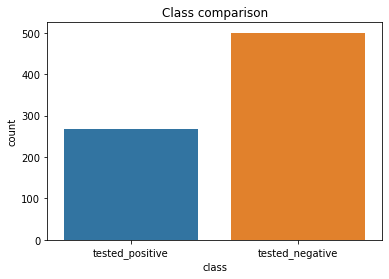

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

sn.countplot(x='class',data=dia_all)
plt.title('Class comparison')
plt.show()

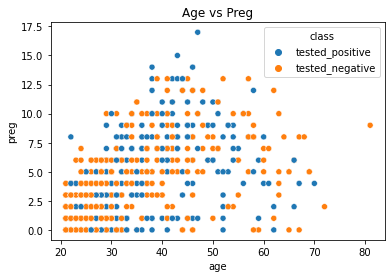

In [13]:
sn.scatterplot(data=dia_all,x='age',y='preg',hue='class')
plt.title('Age vs Preg')
plt.show()

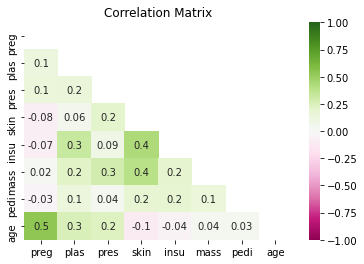

In [14]:
msk = np.triu(cor_matrix)
sn.heatmap(cor_matrix, annot=True,fmt='.1g',vmax=1,vmin=-1,mask=msk,cmap='PiYG')
plt.title('Correlation Matrix')
plt.show()

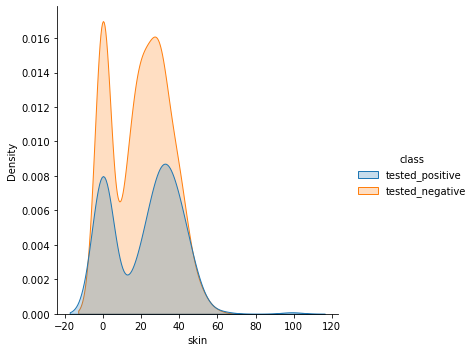

In [15]:
sn.displot(dia_all, x="skin", hue="class", kind="kde", fill=True)

# Model 

### Decision Tree Criterion = Gini 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

le = preprocessing.LabelEncoder()
targetvar_label = le.fit_transform(targetvar)

data_gini=[]

for i in range(10,20):
    x_train, x_test, y_train, y_test = train_test_split(sourcevars, targetvar_label, train_size=0.7 ,random_state=i) 
    DT_model_gini = DecisionTreeClassifier(criterion='gini')
    DT_model_gini = DT_model_gini.fit(x_train,y_train)
    y_pred = DT_model_gini.predict(x_test)

    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    data_gini.append(('gini',i,accuracy,precision,recall))

cols=['Type','Random state','Accuracy','Precision','Recall']
result_gini = pd.DataFrame(data_gini, columns=cols)
result_gini

,Type,Random state,Accuracy,Precision,Recall
0,gini,10,0.714286,0.636364,0.563218
1,gini,11,0.709957,0.615385,0.487805
2,gini,12,0.714286,0.607143,0.607143
3,gini,13,0.701299,0.604651,0.597701
4,gini,14,0.645022,0.439394,0.391892
5,gini,15,0.701299,0.512500,0.577465
6,gini,16,0.722944,0.635135,0.559524
7,gini,17,0.701299,0.573171,0.580247
8,gini,18,0.675325,0.533333,0.592593
9,gini,19,0.666667,0.500000,0.545455


In [17]:
print('Metrics : Gini','\nAverage accuracy =',round(result_gini['Accuracy'].mean(),2),'\nAverage precision =',round(result_gini['Precision'].mean(),2),'\nAverage recall =',round(result_gini['Recall'].mean(),2))

Metrics : Gini 
Average accuracy = 0.7 
Average precision = 0.57 
Average recall = 0.55


### Decision Tree Criterion = Entropy 

In [18]:
data_entropy=[]
for i in range(10,20):
    x_train, x_test, y_train, y_test = train_test_split(sourcevars, targetvar_label, train_size=0.7 ,random_state=i) 
    DT_model_entropy = DecisionTreeClassifier(criterion='entropy')
    DT_model_entropy = DT_model_entropy.fit(x_train,y_train)
    y_pred = DT_model_entropy.predict(x_test)

    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    data_entropy.append(('entropy',i,accuracy,precision,recall))

cols=['Type','Random state','Accuracy','Precision','Recall']
result_entropy = pd.DataFrame(data_entropy, columns=cols)
result_entropy

,Type,Random state,Accuracy,Precision,Recall
0,entropy,10,0.701299,0.612500,0.563218
1,entropy,11,0.709957,0.615385,0.487805
2,entropy,12,0.709957,0.595506,0.630952
3,entropy,13,0.688312,0.584270,0.597701
4,entropy,14,0.709957,0.544304,0.581081
5,entropy,15,0.705628,0.518519,0.591549
6,entropy,16,0.709957,0.613333,0.547619
7,entropy,17,0.740260,0.632911,0.617284
8,entropy,18,0.679654,0.543210,0.543210
9,entropy,19,0.692641,0.537500,0.558442


In [19]:
print('Metrics : Entropy','\nAverage accuracy =',round(result_entropy['Accuracy'].mean(),2),'\nAverage precision =',round(result_entropy['Precision'].mean(),2),'\nAverage recall =',round(result_entropy['Recall'].mean(),2))

Metrics : Entropy 
Average accuracy = 0.7 
Average precision = 0.58 
Average recall = 0.57


In [20]:
result=result_gini.append(result_entropy)
result

,Type,Random state,Accuracy,Precision,Recall
0,gini,10,0.714286,0.636364,0.563218
1,gini,11,0.709957,0.615385,0.487805
2,gini,12,0.714286,0.607143,0.607143
3,gini,13,0.701299,0.604651,0.597701
4,gini,14,0.645022,0.439394,0.391892
5,gini,15,0.701299,0.512500,0.577465
6,gini,16,0.722944,0.635135,0.559524
7,gini,17,0.701299,0.573171,0.580247
8,gini,18,0.675325,0.533333,0.592593
9,gini,19,0.666667,0.500000,0.545455


## Performance comparison Gini Vs Entropy

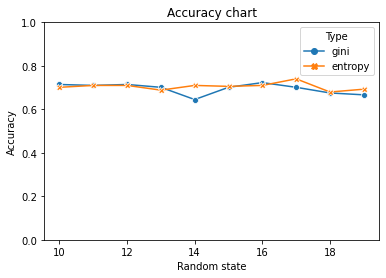

In [21]:
ch1 = sn.lineplot(result['Random state'],result['Accuracy'],hue=result['Type'], style=result['Type'],markers=True, dashes=False)
ch1.set(ylim=(0, 1))
plt.title('Accuracy chart')
plt.show()

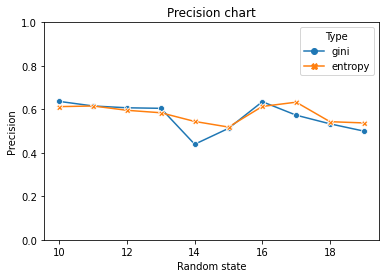

In [22]:
ch2 = sn.lineplot(result['Random state'],result['Precision'],hue=result['Type'], style=result['Type'],markers=True, dashes=False)
ch2.set(ylim=(0, 1))
plt.title('Precision chart')
plt.show()

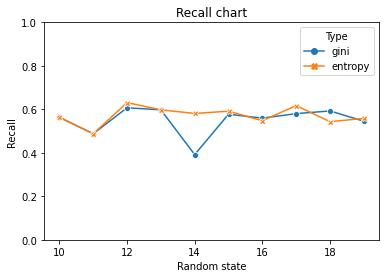

In [23]:
ch3 = sn.lineplot(result['Random state'],result['Recall'],hue=result['Type'], style=result['Type'],markers=True, dashes=False)
ch3.set(ylim=(0, 1))
plt.title('Recall chart')
plt.show()

### From the above graph comparisons it can be seen that Decision Tree with default gini and entropy performs almost same in terms of accuracy for the given data and selected random state.
### Both true positive rate graph shows entropy performing better than gini where precision is almost similar.
### F1 score can be used for finalizing model.

## Standardizing the data 

#### 1.Standardizing the data for the decision tree will not change the performance as in some other algorithms.
#### 2.In gradient descent standardized data can help in faster convergence but decision tree does not use gradient descent.
#### 3.Also the fact that scaling down the variables will result in the same nodes as in the non scaled case for the same data.
#### 4.Decision Tree will always looks for the best split based on the Gini or Entropy.
#### 5.But a small change in the data or order will affect the tree structure and its performance.

## Varying min_samples_split parameter

,Type,min_samples_split,Accuracy,Precision,Recall
0,entropy,2,0.774892,0.691489,0.738636
1,entropy,5,0.774892,0.687500,0.750000
2,entropy,10,0.783550,0.715909,0.715909
3,entropy,15,0.783550,0.726190,0.693182


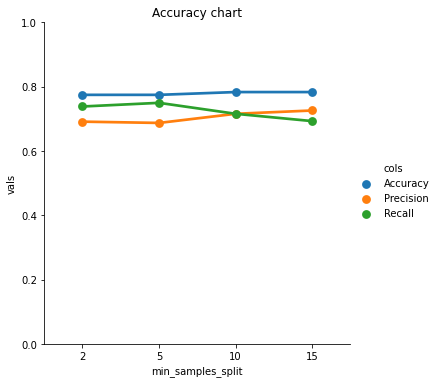

In [24]:
data_sample_split=[]
x_train, x_test, y_train, y_test = train_test_split(sourcevars, targetvar_label, train_size=0.7 ,random_state=123)

for i in (2,5,10,15):
    DT_model_entropy = DecisionTreeClassifier(min_samples_split=i, criterion='entropy')
    DT_model_entropy = DT_model_entropy.fit(x_train,y_train)
    y_pred = DT_model_entropy.predict(x_test)

    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    data_sample_split.append(('entropy',i,accuracy,precision,recall))

cols=['Type','min_samples_split','Accuracy','Precision','Recall']
result_sample_split = pd.DataFrame(data_sample_split, columns=cols)

df = result_sample_split.iloc[:,1:].melt('min_samples_split', var_name='cols',  value_name='vals')
g = sn.factorplot(x="min_samples_split", y="vals", hue='cols', data=df)
g.set(ylim=(0, 1))
plt.title('Accuracy chart')
result_sample_split


### From the above graph we can infer that when min_samples_split=10 it gives best performance based on all 3 metrics for the used data and it can be the best model.

## Varying max_depth parameter

,Type,max_depth,Accuracy,Precision,Recall
0,entropy,3,0.770563,0.710843,0.670455
1,entropy,4,0.718615,0.632184,0.625000
2,entropy,5,0.757576,0.700000,0.636364
3,entropy,6,0.779221,0.698925,0.738636


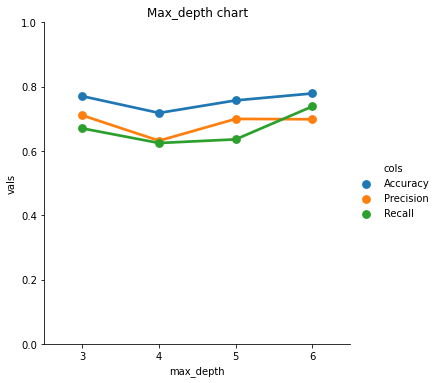

In [25]:
data_max_depth=[]
for i in (3,4,5,6):
    DT_model_entropy = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    DT_model_entropy = DT_model_entropy.fit(x_train,y_train)
    y_pred = DT_model_entropy.predict(x_test)

    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    data_max_depth.append(('entropy',i,accuracy,precision,recall))

cols=['Type','max_depth','Accuracy','Precision','Recall']
result_max_depth = pd.DataFrame(data_max_depth, columns=cols)
df = result_max_depth.iloc[:,1:].melt('max_depth', var_name='cols',  value_name='vals')
g = sn.factorplot(x="max_depth", y="vals", hue='cols', data=df)
g.set(ylim=(0, 1))
plt.title('Max_depth chart')
result_max_depth

### It can be observed that max_depth=6 does not the best Precision but has good accuracy and best recall. Hence it can be the best model of the four. 
### F1 score can be used for finalizing model.